# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

1. The pie chart which shows the distribution of unique female versus male mice used in the study shows
 that there are almost equal number of males and females in the dataset. But this pie chart does not give the 
 distribution of males and females across the 10 drug regimens. This could give a better understanding of the 
 dataset per drug regimen. 


2. The box plot that shows the distribution of the tumor volume for each treatment group illustrates that 
Capomulin and Ramicane have lower final tumor volume numbers with upper bound of 51.8 for Capomulin and 54.3 
for Ramicane as compared to 82.7 and 87.6 for Infubinol and Ceftamin. It is also noticed that Capomulin has a 
IQR of 7.7 while Ceftamin has a higher IQR of 15.5 which is the highest amongst the 4 drug regimens. This tells 
us that there is higher variability in the tumor volumes for Ceftamin and it seems a less reliable drug as compared 
to Capomulin because tumor volumes are spread over a bigger range specifying that Ceftamin is not as effective as 
Capomulin giving different results for tumor volumes in mices. 


3. The line plot of tumor volume vs. time point for a single mouse treated with Capomulin
 graph is a single graph showiing 1 mice over the course of 45 days. 9 line charts for the rest of drug regimens
 would help compare the 10 drug regimens. However, this could be misleading as it would be 10 mices from a dataset 
 of a total of 247 mices. The solution in my opinion would be to first group the mices by the drug regimens in 
 10 groups and then calculating the average timepoints at each timepoint (0,5,10,15,20,25,30,35,40,45) 
 for each drug and then plot 10 lines on 1 chart with timepoint on the x-axis and tumor volume on the y-axis with 
 color legends of the 10 drug regimens. This will help us see a trend amongst the 10 drug regimens and the tumor 
 volume over the course of 45 days. 

 4. The scatter plot of mouse weight vs. the average observed tumor volume for the Capomulin regimen illustrates 
 that as the average weight of mice is increasing the tumor volumes of mices are increasing too. The correlation
 coefficient between the weight and tumor volume is 0.84 which is close to strong positive correlation. 


 

In [250]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df= pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [251]:
# Checking the number of mice.
count_of_mice= merged_df["Mouse ID"].nunique()
count_of_mice


249

In [252]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


dup_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

dup_mice

array(['g989'], dtype=object)

In [253]:
# Optional: Get all the data for the duplicate mouse ID.


In [254]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = merged_df[merged_df['Mouse ID'].isin(dup_mice)==False]
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [255]:
# Checking the number of mice in the clean DataFrame.
number_of_new_mice= cleaned_df["Mouse ID"].nunique()
number_of_new_mice

248

## Summary Statistics

In [256]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean= cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median= cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance= cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
standard_deviation= cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem= cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
Summary_statistics_df= pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                                      "Tumor Volume Variance" :	variance, "Tumor Volume Std. Dev.": standard_deviation,
                                      "Tumor Volume Std. Err." : sem})
Summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [257]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = cleaned_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

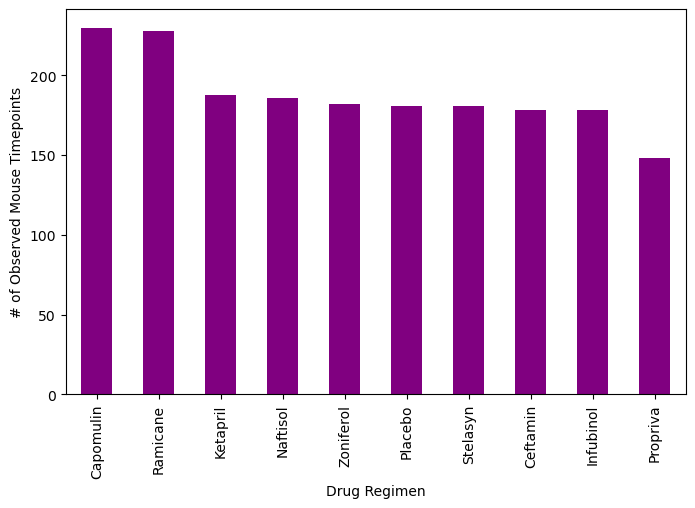

In [258]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
group_by_regimen= cleaned_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoints_per_drug_sorted = group_by_regimen.sort_values(ascending=False)
using_pandas= timepoints_per_drug_sorted.plot(kind= "bar", figsize=(8,5), xlabel="Drug Regimen",
                                     ylabel="# of Observed Mouse Timepoints", color="purple")
plt.show()

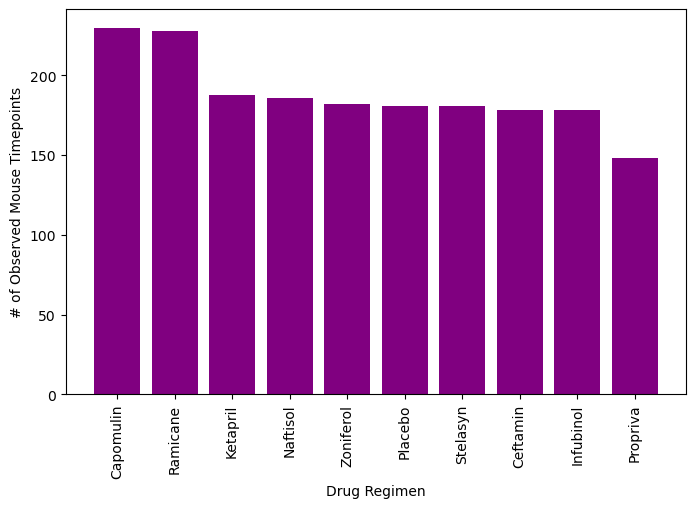

In [259]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8,5)) 
plt.bar(timepoints_per_drug_sorted.index, timepoints_per_drug_sorted.values, color="purple", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


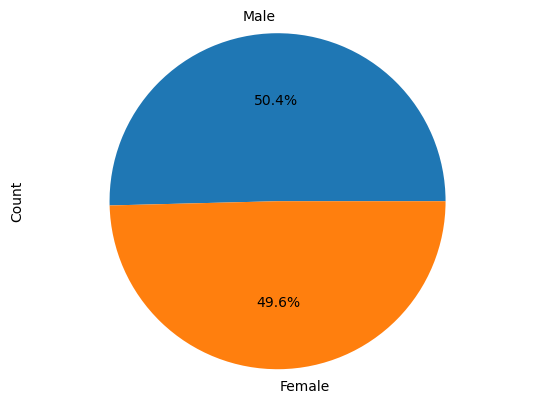

In [260]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
group_by_sex= cleaned_df.groupby(["Sex"])["Mouse ID"].nunique()

# Get the unique mice with their gender
print(group_by_sex)

# Make the pie chart
group_by_sex = group_by_sex.reindex(["Male", "Female"])
group_by_sex.plot(kind="pie", autopct='%1.1f%%', ylabel="Count")
plt.axis("equal")
plt.show()

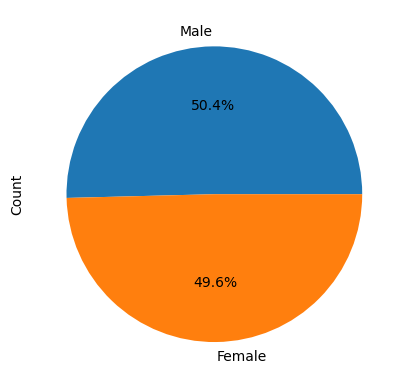

Sex
Male      125
Female    123
Name: Mouse ID, dtype: int64


In [261]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels= ["Male" , "Female"]
sizes= [125,123]
colors= ["blue", "orange"]

plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=False)
plt.ylabel("Count")
plt.show()

# Get the unique mice with their gender
print(group_by_sex)

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [262]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_df[cleaned_df['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_per_mouse = filtered_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].last()
final_tumor_volume_per_mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

new_df= pd.merge(cleaned_df, final_tumor_volume_per_mouse, on=("Mouse ID", "Tumor Volume (mm3)"), how="inner")
df= new_df.set_index("Mouse ID")
df


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
u153,0,45.000000,0,Ceftamin,Female,11,25
b447,0,45.000000,0,Ceftamin,Male,2,30
x226,0,45.000000,0,Ceftamin,Male,23,28
t573,0,45.000000,0,Ceftamin,Female,15,27
c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...
a644,45,32.978522,1,Ramicane,Female,7,17
i177,45,33.562402,3,Ramicane,Male,10,18
r944,45,41.581521,2,Capomulin,Male,12,25


In [263]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset

    # Determine outliers using upper and lower bounds

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes= [] 

for drug in selected_regimens:
    drug_df = df.loc[df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    quartiles = drug_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)  
    

    outliers = drug_df[(drug_df < lower_bound) | (drug_df > upper_bound)]
    print(f"--------------------------------------")
    print(f"Results for {drug}:")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers: {outliers}")
    

    final_tumor_volumes.append(drug_df.values)

--------------------------------------
Results for Capomulin:
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------
Results for Ramicane:
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------
Results for Infubinol:
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
--------------------------------------
Results for Ceftamin:
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


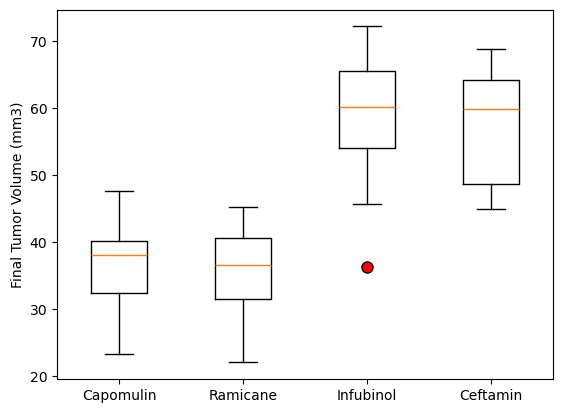

In [264]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(final_tumor_volumes, labels=selected_regimens, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

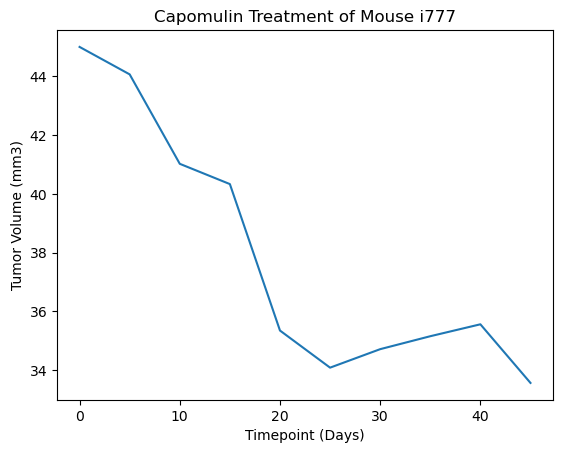

In [265]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse= cleaned_df.loc[cleaned_df["Mouse ID"]=="i177", :]
# single_mouse
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse i777")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


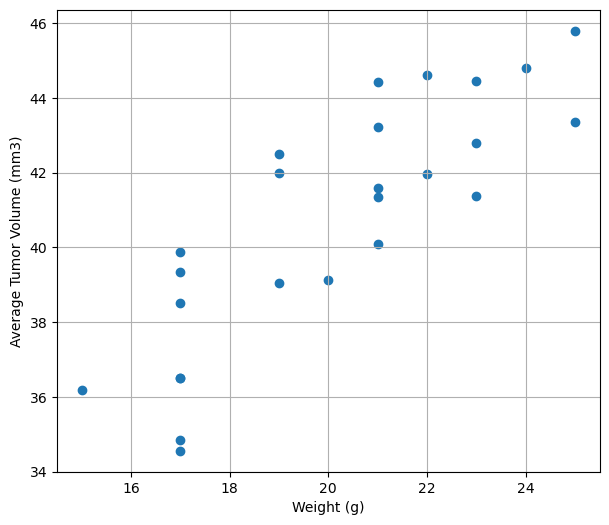

In [266]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(7, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.grid()
plt.show()



## Correlation and Regression

The correlation coefficient between mouse weight and average observed tumor volume intensity is 0.84


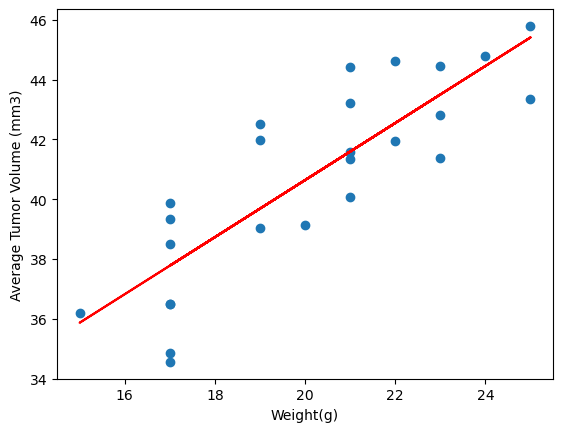

In [267]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

print(f"The correlation coefficient between mouse weight and average observed tumor volume intensity is {round(st.pearsonr(mouse_weight, avg_tumor_volume )[0],2)}")


x_values = mouse_weight
y_values = avg_tumor_volume 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()